In [14]:
%load_ext autoreload
%autoreload 2

from generate import *
from model import DQRP,DQR,DQR_NC
from functions import train_multi,train_process
from plot import plot
from train import train_test

import torch
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plotting the ground truth

In [15]:
SIZE=2**9; taus=torch.Tensor([0.05,0.25,0.5,0.75,0.95]).unsqueeze(1);
models=['linear','wave','triangle']
modelnames=['Linear','Wave','Angle']
errornames=[r'$t(3)$','Exp','Sine']
dataset=[]
x0=torch.linspace(0,1,1000).unsqueeze(dim=1);x=[];y=[];quant0=[]
for model in models:
    dataset=gen_univ(size=SIZE,model=model,error='t',df=2,sigma=1)
    x.append(dataset[:][0].data.numpy())
    y.append(dataset[:][1].data.numpy())
    quant0.append(quant_univ(x0,taus,model=model,error='t',df=2,sigma=1))
ylims=[[-4,7],[-6,5],[1,6.5]]
positions=['upper left','lower left','upper left']
#colors=['r','darkorange','lime','darkviolet','deepskyblue']
names=(r'$\tau=0.05$',r'$\tau=0.25$',r'$\tau=0.5$',r'$\tau=0.75$',r'$\tau=0.95$','Data')

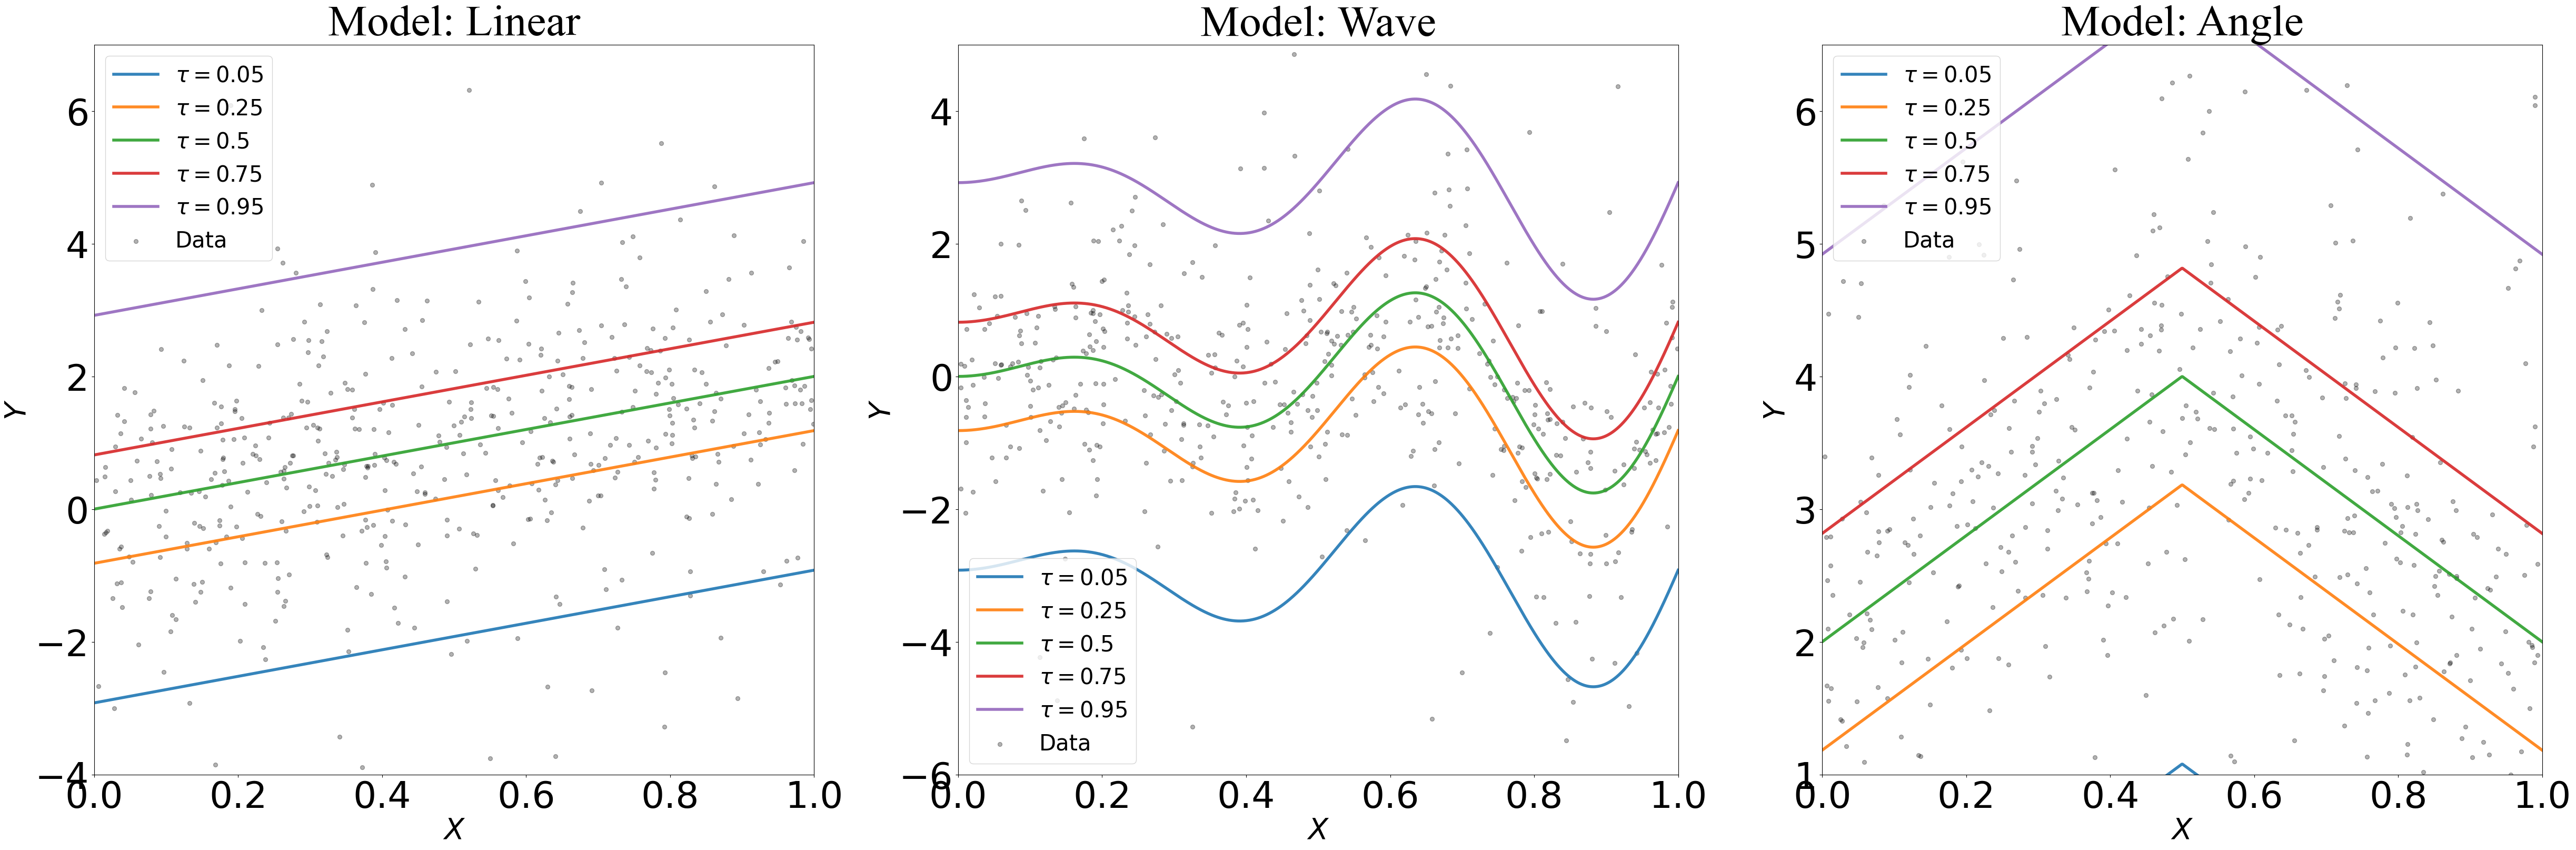

In [16]:
figs, axs = plt.subplots(1,len(models),figsize=(60,18))
#ticksize=15;titlesize=32;llw=3;dlw=3;

for i in range(len(models)):
    axs[i].tick_params(axis='both', which='major', labelsize=50)
    axs[i].set_title('Model: %s'% (modelnames[i]),fontdict={'family':'Times New Roman','size':60})
    axs[i].set_xlabel(r'$X$', fontdict={'family': 'Times New Roman', 'size': 40})
    axs[i].set_ylabel(r'$Y$', fontdict={'family': 'Times New Roman', 'size': 40})
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(ylims[i])
    axs[i].plot(x0, quant0[i], alpha=0.9,lw=4)
    axs[i].scatter(x[i], y[i], color = "k", alpha=0.3,label='Data',s=32)
    axs[i].legend(names,loc=positions[i],fontsize=30)

# Model training

### Setup

In [17]:
taus = torch.Tensor([0.05,0.25,0.5,0.75,0.95]).unsqueeze(1);
error="t"; d=1;df=2;sigma=1; SIZE=2**9

### linear

In [18]:
data_train= gen_univ(model="linear",size=SIZE,error=error,df=df,sigma=sigma)
data_val= gen_univ(model="linear",size=int(SIZE/4),error=error,df=df,sigma=sigma)
x_test=torch.linspace(0,1,1000).unsqueeze(1)
quants = quant_univ(x_test, taus,model="linear",error=error,df=df,sigma=sigma)

In [19]:
preds = train_test("linear", error, df, sigma, taus)

Train


  0%|          | 0/1000 [00:00<?, ?it/s]

 20%|██        | 200/1000 [00:01<00:04, 162.10it/s]


Early stopping!


 20%|██        | 200/1000 [00:00<00:03, 234.67it/s]


Early stopping!


 20%|██        | 200/1000 [00:01<00:04, 174.25it/s]


Early stopping!


 20%|██        | 200/1000 [00:00<00:03, 205.24it/s]

Early stopping!


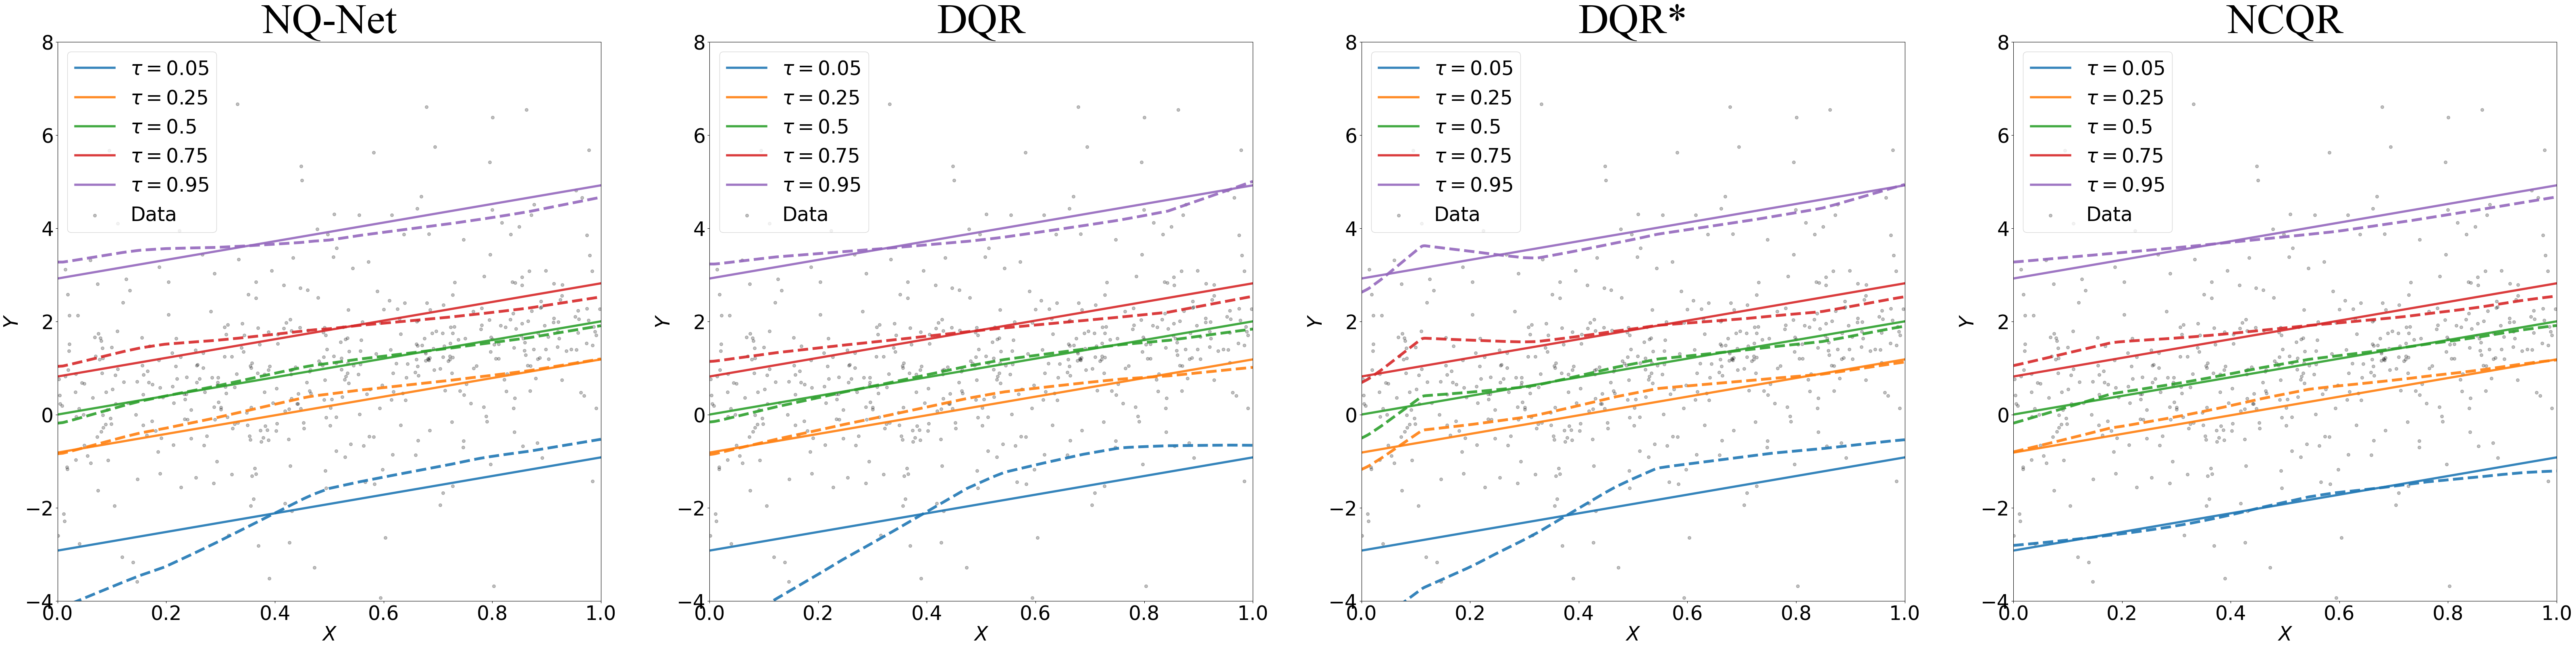

In [20]:
plot(quants, data_train, preds, taus)

### Wave

In [21]:
data_train= gen_univ(model="wave",size=SIZE,error=error,df=df,sigma=sigma)
data_val= gen_univ(model="wave",size=int(SIZE/4),error=error,df=df,sigma=sigma)
x_test=torch.linspace(0,1,1000).unsqueeze(1)
quants = quant_univ(x_test, taus,model="wave",error=error,df=df,sigma=sigma)

In [22]:
preds = train_test("wave", error, df, sigma, taus)

Train


 39%|███▉      | 391/1000 [00:02<00:03, 178.67it/s]


Early stopping!


 74%|███████▎  | 736/1000 [00:03<00:01, 212.05it/s]


Early stopping!


 49%|████▉     | 489/1000 [00:02<00:02, 183.71it/s]


Early stopping!


 38%|███▊      | 378/1000 [00:01<00:03, 206.50it/s]

Early stopping!


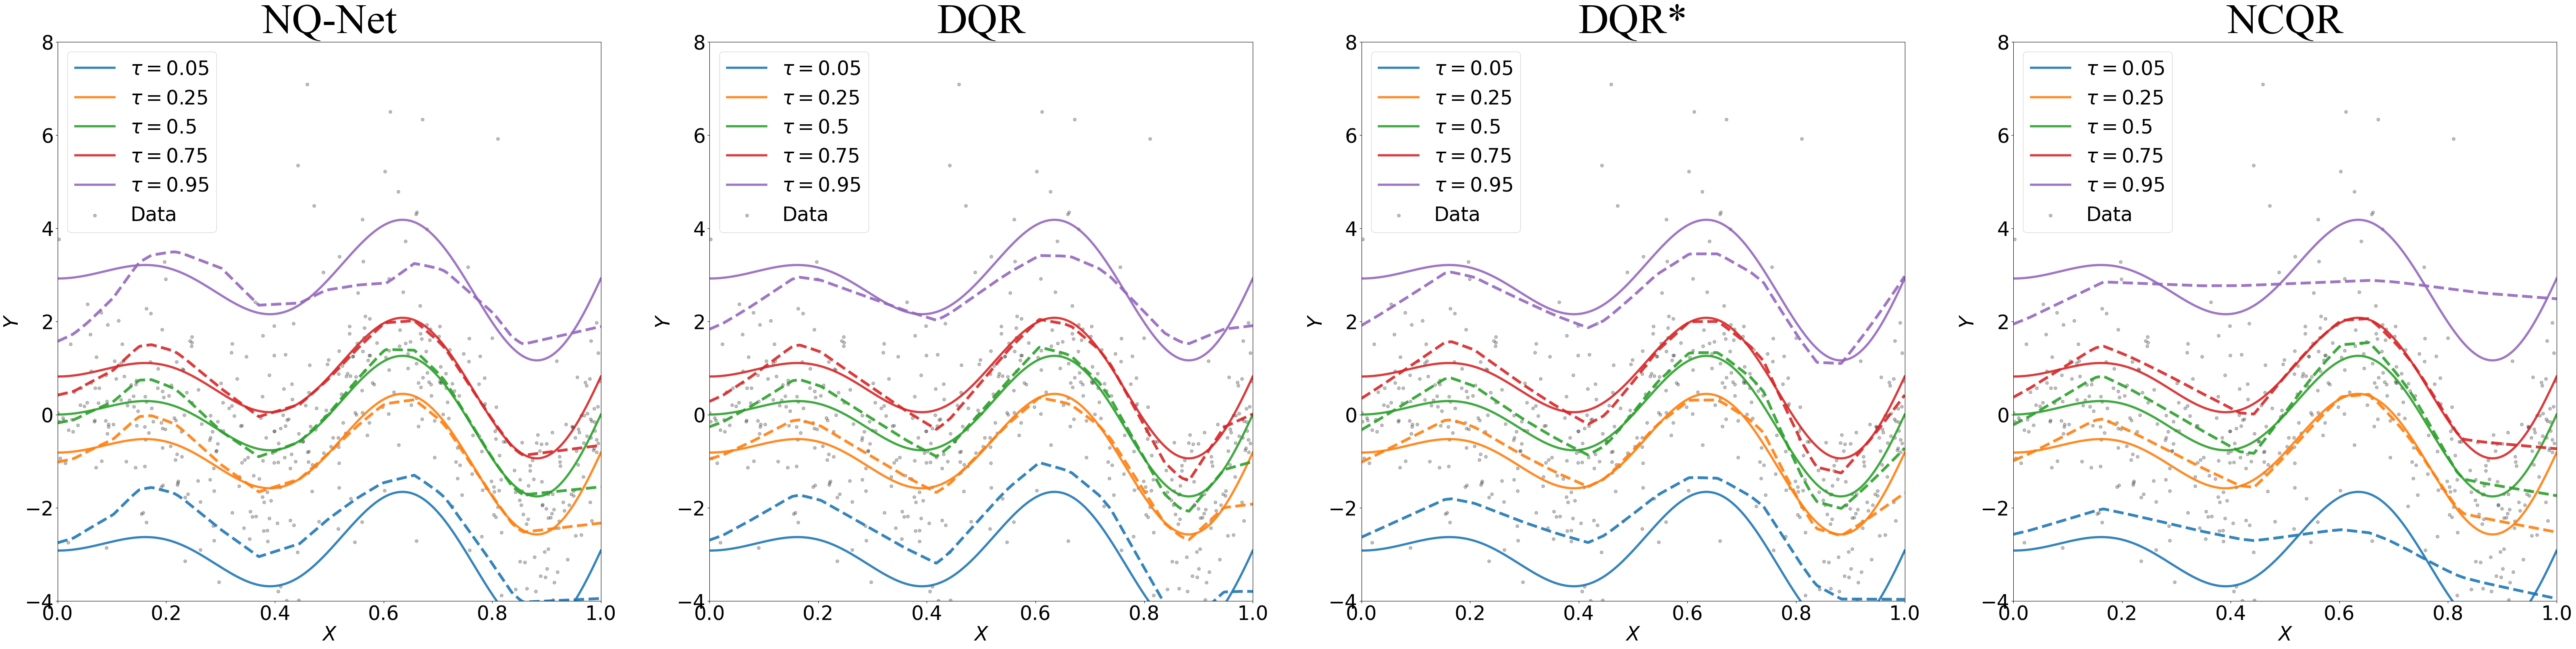

In [23]:
plot(quants, data_train, preds, taus)

### Angle

In [24]:
data_train= gen_univ(model="triangle",size=SIZE,error=error,df=df,sigma=sigma)
data_val= gen_univ(model="triangle",size=int(SIZE/4),error=error,df=df,sigma=sigma)
x_test=torch.linspace(0,1,1000).unsqueeze(1)
quants = quant_univ(x_test, taus,model="triangle",error=error,df=df,sigma=sigma)

In [25]:
preds = train_test("triangle", error, df, sigma, taus)

Train


 79%|███████▉  | 794/1000 [00:03<00:00, 223.74it/s]


Early stopping!


 58%|█████▊    | 578/1000 [00:03<00:02, 178.81it/s]


Early stopping!


 59%|█████▊    | 587/1000 [00:02<00:02, 197.55it/s]

Early stopping!


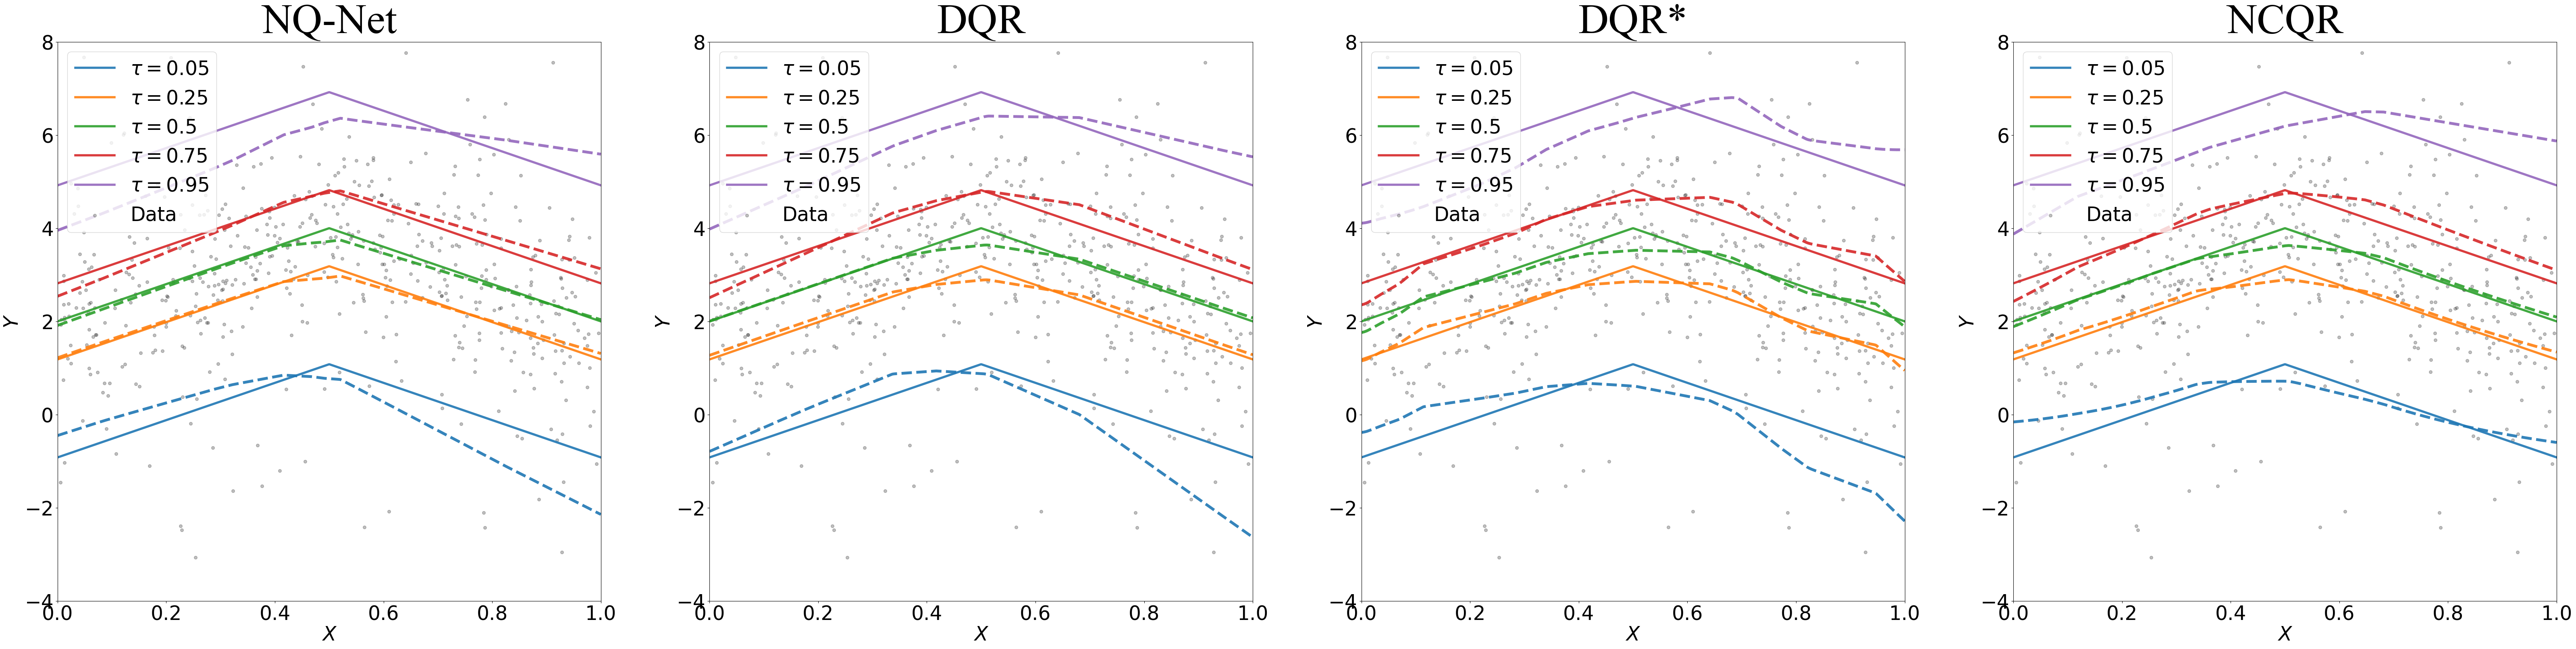

In [26]:
plot(quants, data_train, preds, taus)